In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore Warning
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('./titanic.csv')

# Basic EDA

In [7]:
df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [8]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.shape

(891, 12)

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Cleaning

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Deleting Non essential columns

In [44]:
df.drop('PassengerId', axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.drop('Cabin', axis=1, inplace=True)

### Observation : There are Null values in Age and Cabin Columns

In [14]:
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Observation : There are no duplicates in this dataset

<Axes: >

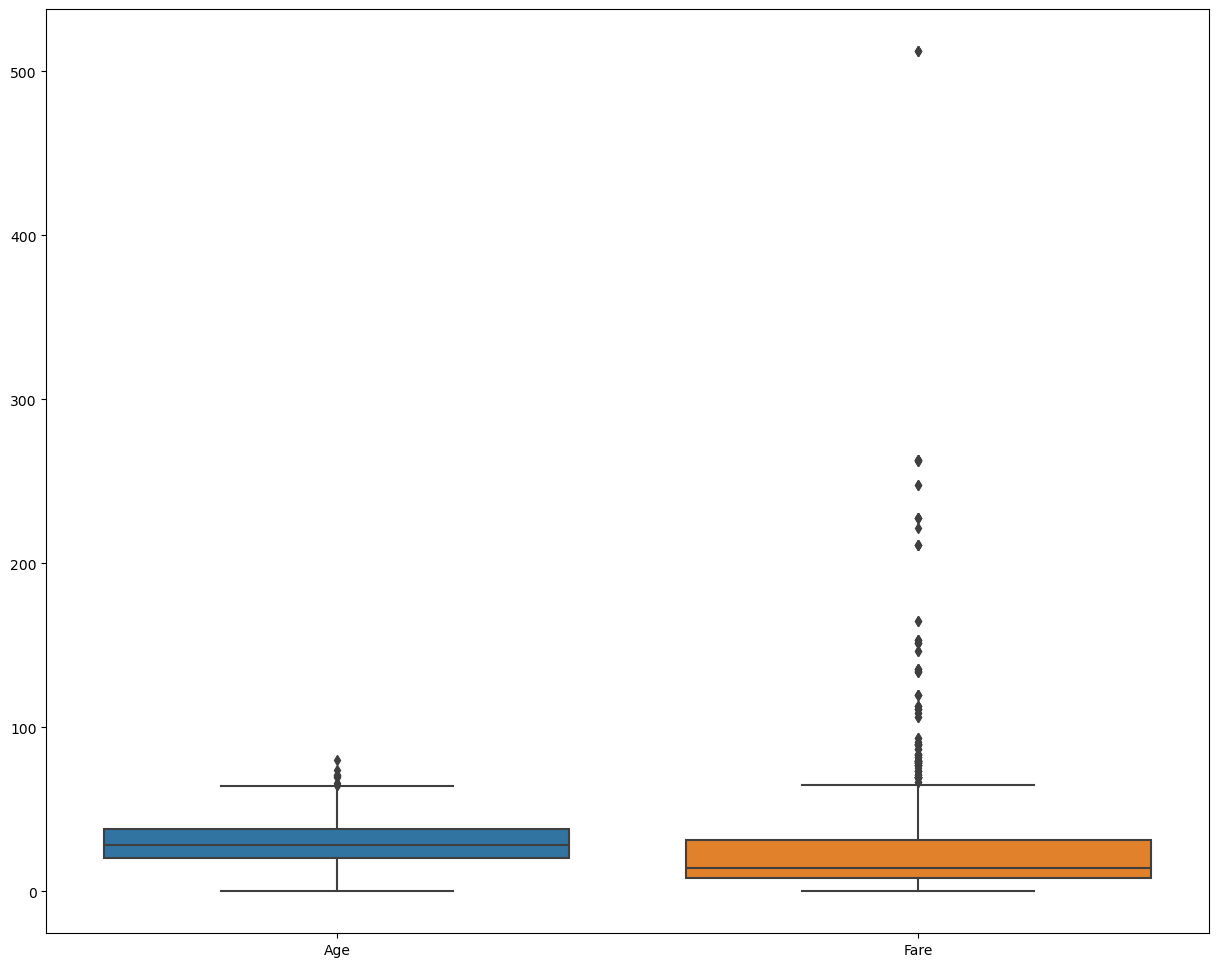

In [19]:
plt.figure(figsize=(15,12)) # Set the Width & Height
sns.boxplot(data=df[['Age','Fare']])

### Observation : There are many outliers in age and Fare

In [20]:
import numpy as np

def detect_outliers_iqr(data):
    outlier_list = []
    
    # Drop missing values
    data = data.dropna()
    
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    IQR = q3 - q1
    
    lwr_bound = q1 - (1.5 * IQR)
    upr_bound = q3 + (1.5 * IQR)
    
    for i in data: 
        if (i < lwr_bound or i > upr_bound):
            outlier_list.append(i)
    
    return outlier_list 

# Assuming df is your DataFrame
for i in ['Age','Fare']:
    outliers = detect_outliers_iqr(df[i])
    print("Outliers in", i, "attribute:", outliers)


Outliers in Age attribute: [66.0, 65.0, 71.0, 70.5, 65.0, 65.0, 71.0, 80.0, 70.0, 70.0, 74.0]
Outliers in Fare attribute: [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0,

In [25]:
def handle_outliers(data):
    # Compute percentiles
    tenth_percentile = np.percentile(data.dropna(), 10)
    ninetieth_percentile = np.percentile(data.dropna(), 90)
    
    # Handle outliers by capping
    data = np.where(data < tenth_percentile, tenth_percentile, data)
    data = np.where(data > ninetieth_percentile, ninetieth_percentile, data)
    
    return data

# Assuming df is your DataFrame
for i in ['Age', 'Fare']:
    df[i] = handle_outliers(df[i])


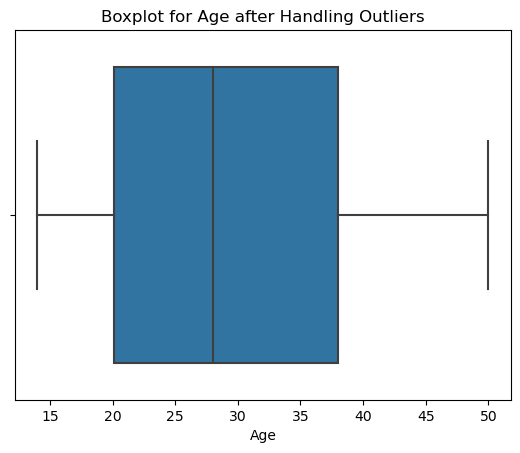

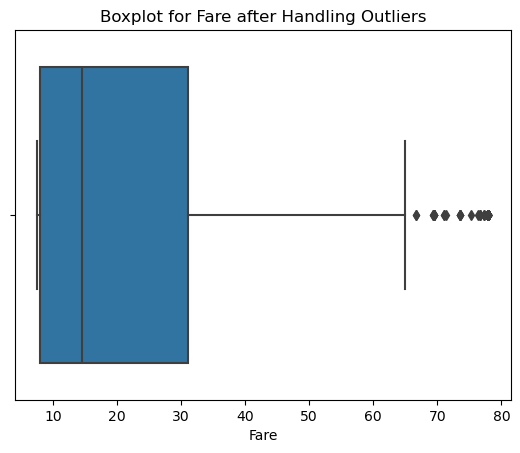

In [27]:
# Plotting boxplot for Age
sns.boxplot(x=df['Age'])
plt.title('Boxplot for Age after Handling Outliers')
plt.show()

# Plotting boxplot for Fare
sns.boxplot(x=df['Fare'])
plt.title('Boxplot for Fare after Handling Outliers')
plt.show()


# Handling Null Values of Age Colums

In [30]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Univarent Analysis

<Axes: xlabel='Survived', ylabel='count'>

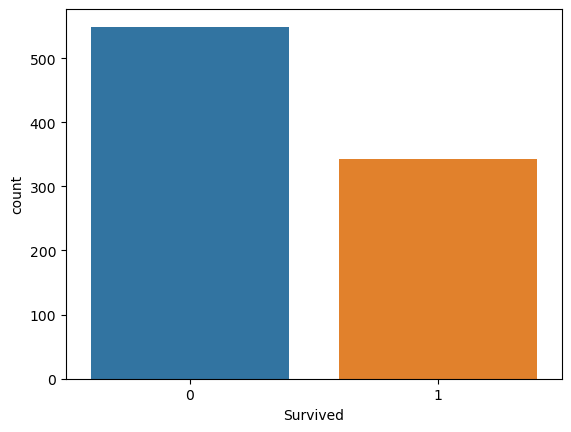

In [33]:
# on Survived Column
sns.countplot(x= df['Survived'])


<Axes: xlabel='Pclass', ylabel='count'>

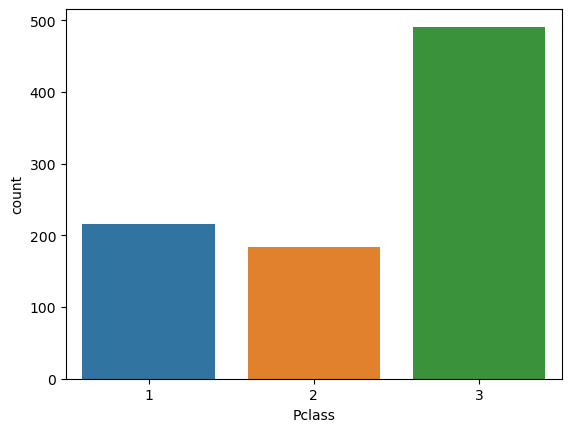

In [34]:
# on Survived Column
sns.countplot(x= df['Pclass'])

<Axes: xlabel='Sex', ylabel='count'>

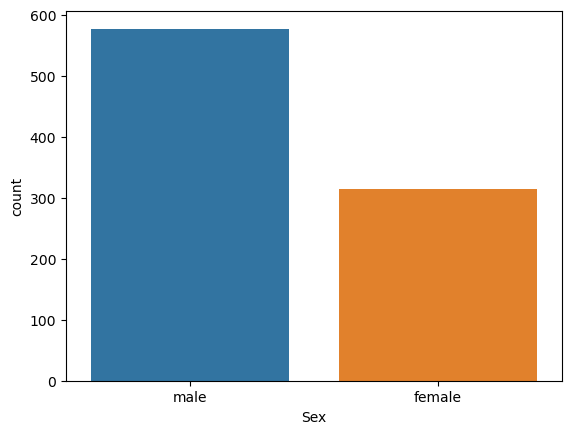

In [35]:
# on Survived Column
sns.countplot(x= df['Sex'])

<Axes: xlabel='SibSp', ylabel='count'>

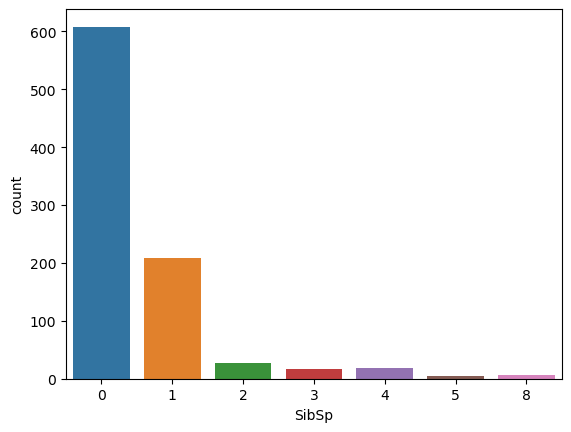

In [36]:
# on Survived Column
sns.countplot(x= df['SibSp'])

<Axes: xlabel='Embarked', ylabel='count'>

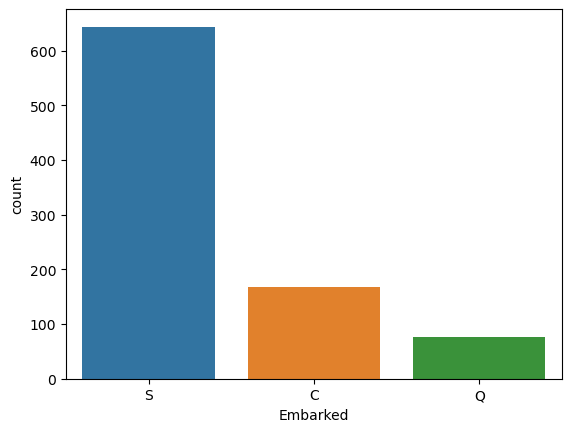

In [40]:
# on Survived Column
sns.countplot(x= df['Embarked'])

<Axes: xlabel='Parch', ylabel='count'>

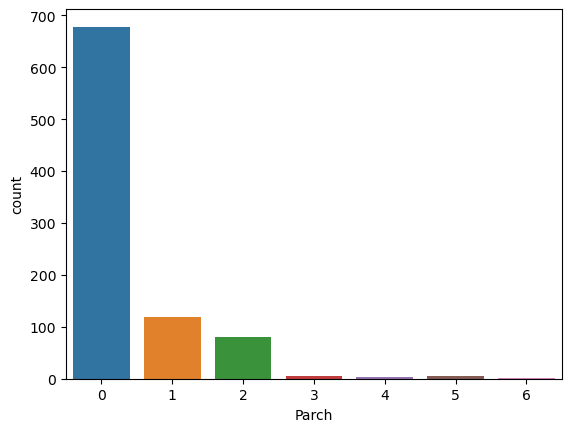

In [37]:
# on Survived Column
sns.countplot(x= df['Parch'])

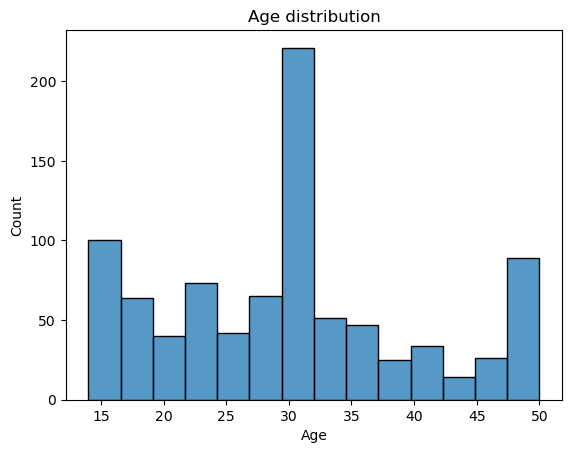

In [38]:
#Resting Age distribution
sns.histplot(df.Age)
plt.title('Age distribution')
plt.show()

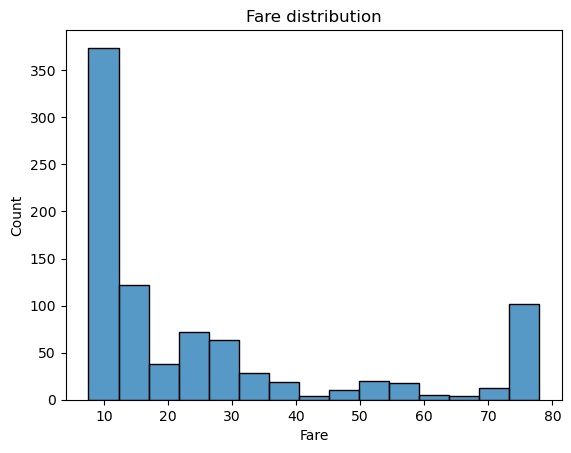

In [39]:
#Resting Fare distribution
sns.histplot(df.Fare)
plt.title('Fare distribution')
plt.show()

# Bivarient Analysis

<Axes: xlabel='Survived', ylabel='Age'>

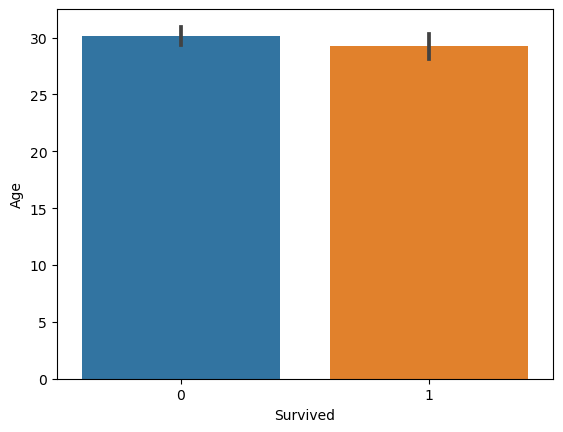

In [42]:
sns.barplot(y='Age',x='Survived',data=df)

In [45]:
plt.figure(figsize=(20,9));
sns.heatmap(df.corr(),annot=True,cmap='bwr');  
plt.title("Correlation map")

ValueError: could not convert string to float: 'male'

<Figure size 2000x900 with 0 Axes>